## Visualization exercise
```In the following exercise you are to practice simple data scientist tasks. Mainly, you learn about a few common, useful but slightly advanced visualization methods. You will work with the Chicago Crime data, which concerns crimes in Chicago. You will be asked to draw some of this data features.```

```~Ittai Haran```

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

```Start with loading the data.
link for the data: https://drive.google.com/open?id=1oy7hnl3u8IYt7U69kOqATwbooEXSUzrm```

In [3]:
df = pd.read_csv('resources/Crimes_-_2001_to_present.csv')

```What are the types of the columns? Which columns contain numbers? Which contain nans?
Among the categorical columns that contain nans, how many distinct values are there?```

In [7]:
print("columns are ", df.columns.to_list())

columns_floats = df.columns[df.dtypes == float]
columns_with_nans = df.columns[df.isnull().any()]

for col in columns_with_nans:
    if col not in columns_floats:
        print("for", col, "number of distincts values is", str(len(set(df[col][np.logical_not(df[col].isnull())]))))

columns are  ['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Location']
for Case Number number of distincts values is 6491706
for Location Description number of distincts values is 173
for Location number of distincts values is 850795


```Plot the distribution of each of the numeric features (hist: plt.hist, or pd.DataFrame.hist).
Also, If there are columns that have missing values, but also have less than 200 different values, plot their histogram ( maybe by using sns.categorical.countplot).```

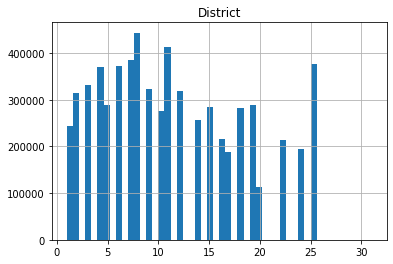

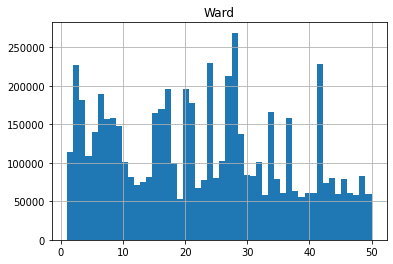

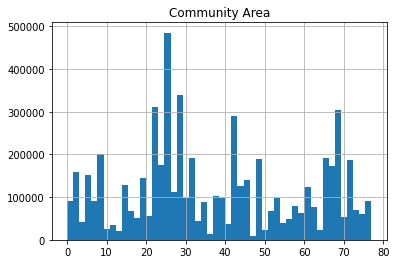

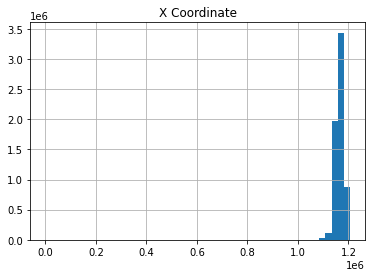

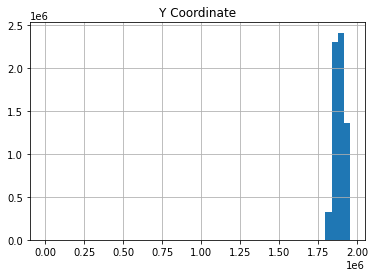

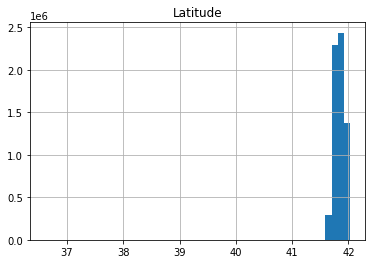

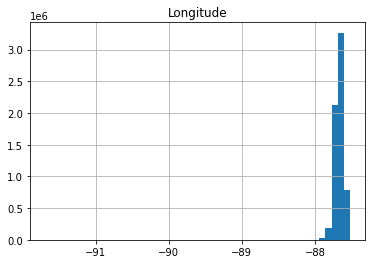

In [8]:
for col in columns_with_nans:
    if col in columns_floats:
        df[col].hist(bins = 50)
        plt.title(col)
        plt.show()


```Now plot the number of crimes in Chicago per month, and the number of arrests per month. Use df.plot.```

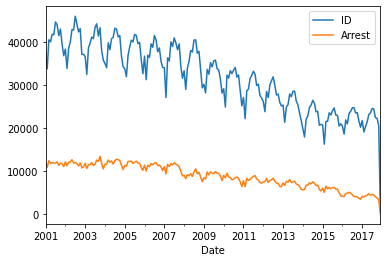

In [13]:
df['Date'] = pd.to_datetime(df.Date, format='%m/%d/%Y %I:%M:%S %p')
df.set_index('Date').resample('1m').agg({'ID':len, 'Arrest':sum}).plot()
plt.show()

```Do the same for weeks rather than months. Use df.resample.```

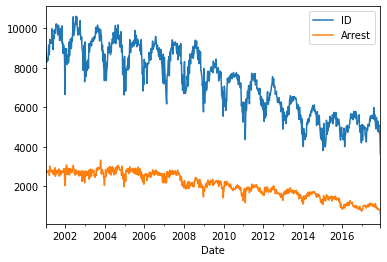

In [14]:
df.set_index('Date').resample('1W').agg({'ID':len, 'Arrest':sum}).plot()
plt.show()

```Lets look at the distribution of 'Ward', for Arrest=True and for Arrest=False. Use sns.violinplot.```

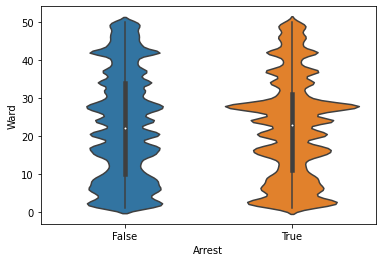

In [19]:
sns.violinplot(data = df, x = 'Arrest', y = 'Ward')
plt.show()

```Plot in the same graph, for each Primary Type, the number of crimes of this type, for each month. Do it using df.pivot_table.```

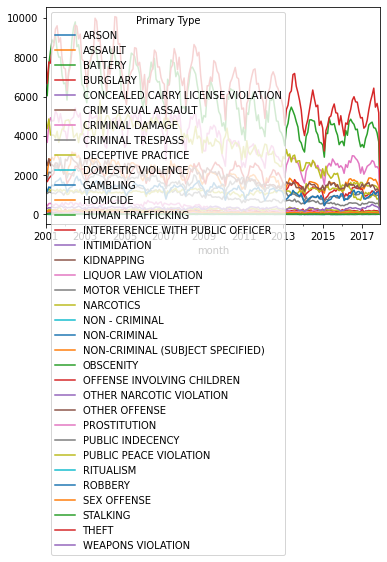

In [20]:
df['month'] = df['Date'].dt.to_period('m')
df[['month', 'Primary Type']].dropna().pivot_table(index = 'month', columns = ['Primary Type'], aggfunc = len).plot()
plt.show()

```Let's focus on the features 'X Coordinate', 'Y Coordinate'. What is the relation between them? Use sns.pairplot and sns.jointplot to answer this question. You might want to get rid of the missing values before you act. Can you find another problem preventing you from understanding the relations between the features? What is it and how can you get rid of it?```

In [28]:
df_x_y = df[['X Coordinate', 'Y Coordinate']].dropna()
df_x_y.columns = ['x', 'y']

# sns.pairplot(df_x_y)
# plt.show()

df_sum = np.sum(df_x_y == 0, axis = 1)
print(df_sum != 0)
df_x_y = df_x_y[df_sum == 0]

# sns.pairplot(df_x_y)
# plt.show()

0          False
1          False
2          False
3          False
4          False
           ...  
6491994    False
6491995    False
6491996    False
6492087    False
6492088    False
Length: 6404618, dtype: bool


```Split the map into 25 districts, and plot the number of crime incidents in each one of them, per month. First rotate the map so it will be more 'square-like' (Hint: by a linear transformation).```

In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
pca = PCA(2)
print(df_x_y.shape)
x_y_pcaed = pd.DataFrame(pca.fit_transform(df_x_y.dropna()), columns = ['x', 'y'], index = df_x_y.index)
print(x_y_pcaed.shape)
# x_y_pcaed_percentiles = pd.DataFrame(x_y_pcaed.rank().values/float(len(x_y_pcaed)), columns = ['x', 'y'], index = x_y_pcaed.index)
# x_y_pcaed_cliped = x_y_pcaed[((x_y_pcaed_percentiles['x']>0.1).astype(int)+(x_y_pcaed_percentiles['y']>0.1).astype(int)+
#                               (x_y_pcaed_percentiles['x']<0.9).astype(int)+(x_y_pcaed_percentiles['y']<0.9).astype(int)) == 4]
# x_y_pcaed_cliped = pd.DataFrame((MinMaxScaler().fit_transform(x_y_pcaed_cliped)*5).astype(int)/5.0, columns = ['x', 'y'],
#                                index = x_y_pcaed_cliped.index)
# x_y_pcaed_cliped['month'] = x_y_pcaed_cliped.index.to_period('m')
# x_y_pcaed_cliped.pivot_table(index = 'month', columns = ['x', 'y'], aggfunc=len).plot()

(6404433, 2)
(6404433, 2)


```Bonus: create a word cloud from the words you can find in the 'Description' field.```

In [33]:
from wordcloud import WordCloud

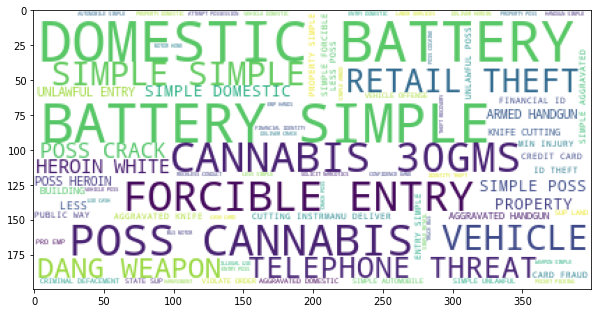

In [34]:
string_of_descs = ' '.join(list(df['Description']))
wordcloud = WordCloud(
                          background_color='white',
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(string_of_descs)

fig = plt.figure(1, figsize=(10,10))
plt.imshow(wordcloud)
plt.show()